<a href="https://colab.research.google.com/github/ArfaKhalid/LeChienSmartFit-ML-Model/blob/main/LeChienSmartFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhancing le Chein Gear Shopping: Smart Sizing Solution

## Project Overview:

A shop specializing in harnesses for avalanche-rescue dogs, and have recently expanded offerings to include le chein (dog) boots. While customers generally choose the right harness sizes, there's a common issue with incorrect le chien boot orders. Observing that customers often buy both harnesses and boots together, as a Market Analyst come up with an idea.

 **What if we could estimate the correct le chein boot size based on the chosen harness? This way, we could alert customers before purchase if the selected boots are likely to be the wrong size, enhancing their shopping experience.**
### Tasks:
1. Build a model that can estimate the best boot size for le chien based on their harness size.
2. Machine-learning models are special; rather than being edited by people so that they work well, machine learning models are shaped by data.
3. A model is a function that accepts data as an input and produces an output.They contain logic and parameters.
4. Select a model based on how it works logically, but not based on its parameter values.
5. Parameter values are set to an initial guess( RANDOM), then adjusted during an automated learning process called training. During training, these parameters are automatically changed to two new values that give better results.

# Step 1
## Preparing data

In [1]:
import pandas
# Make a dictionary of data for boot sizes
# and harness sizes in cm
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40,
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41,
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37,
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
dataset.head()

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57


# Step 2
## Select a model
Purpose : I want to use harness size to estimate boot size. This means harness_size is my input. I want a model that will process the input and make its own estimations of the boot size (output).

In [3]:
# Load a library
import statsmodels.formula.api as smf

# First, we define our formula as boot_size is explained by harness_size
formula = "boot_size ~ harness_size"

# Create the model - OLS(Trendline)
model = smf.ols(formula = formula, data = dataset)

if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")

Model selected but it does not have parameters set. We need to train it!


# Step 3
## Train/ fit Model
Find the values so that the model can reliably estimate le chein boot size based on their harness size.

In [4]:
# Train (fit) the model so that it creates a line that fits the data

fitted_model = model.fit()

# Print information about the model now it has been fit
print("The following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params[1]}\n"+
        f"Line Intercept: {fitted_model.params[0]}")

The following model parameters have been found:
Line slope: 0.585925416738271
Line Intercept: 5.71910981268259


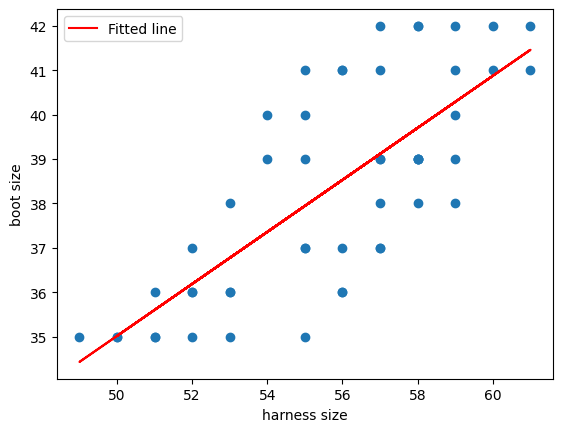

In [5]:
import matplotlib.pyplot as plt

# Show a scatter plot of the data points and add the fitted line
# Don't worry about how this works for now
plt.scatter(dataset["harness_size"], dataset["boot_size"])
plt.plot(dataset["harness_size"], fitted_model.params[1] * dataset["harness_size"] + fitted_model.params[0], 'r', label='Fitted line')

# add labels and legend
plt.xlabel("harness size")
plt.ylabel("boot size")
plt.legend()

In [6]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [57.5] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print("Estimated approximate_boot_size:")
print(approximate_boot_size[0])

Estimated approximate_boot_size:
39.409821275133176


# Step 5
## Interpretation
### Goal of training
Models don’t train themselves. They're trained using data plus two pieces of code, the objective function and the optimizer.
- Objective functions(purpose of model building) judge whether the model is doing a good job (estimating boot size well) or bad job (estimating boot size badly).
- During training, the model makes a prediction, and the objective function calculates how well it performed. The optimizer is code that then changes the model’s parameters so the model will do a better job next time.
- The objective, data, and optimizer are simply a means to train the model. They aren't needed once training is complete.
- Training only changes the parameter values inside of a model; it doesn't change what kind of model is used.

# Data Exploration in Pandas

In [7]:
%pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=f64728a74bbcf513f6e383f1b17811243d234a334d79af3b115442af660bea52
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [8]:
%pip install requests

In [9]:
import pandas as pd
import requests

# URL to the raw CSV file
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv'
# Download the file using requests
response = requests.get(url)
with open('doggy-boot-harness.csv', 'wb') as f:
    f.write(response.content)

# Read the CSV file using pandas
dataset = pd.read_csv('doggy-boot-harness.csv')

# Print the data
dataset.head()


,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


# Filter data by Columns

In [10]:
# the harness sizes
print("Harness sizes")
print(dataset.harness_size)

# Remove the sex and age-in-years columns.
del dataset["sex"]
del dataset["age_years"]

# Print the column names
print("\nAvailable columns after deleting sex and age information:")
print(dataset.columns.values)

Harness sizes
0     58
1     58
2     52
3     58
4     57
5     52
6     55
7     53
8     49
9     54
10    59
11    56
12    53
13    58
14    57
15    58
16    56
17    51
18    50
19    59
20    59
21    59
22    55
23    50
24    55
25    52
26    53
27    54
28    61
29    56
30    55
31    60
32    57
33    56
34    61
35    58
36    53
37    57
38    57
39    55
40    60
41    51
42    52
43    56
44    55
45    57
46    58
47    57
48    51
49    59
Name: harness_size, dtype: int64

Available columns after deleting sex and age information:
['boot_size' 'harness_size']


# Filter data by Rows


In [11]:
# Print the data at the top of the table
print("TOP OF TABLE")
print(dataset.head())

# print the data at the bottom of the table
print("\nBOTTOM OF TABLE")
print(dataset.tail())

TOP OF TABLE
   boot_size  harness_size
0         39            58
1         38            58
2         37            52
3         39            58
4         38            57

BOTTOM OF TABLE
    boot_size  harness_size
45         41            57
46         39            58
47         39            57
48         35            51
49         39            59


# Logical Based filtering

In [12]:
# Print how many rows of data we have
print(f"We have {len(dataset)} rows of data")

# Determine whether each avalanche dog's harness size is < 55
is_small = dataset.harness_size < 55
print("\nWhether the dog's harness was smaller than size 55:")
print(is_small)

# Apply'mask' to this data to keep the smaller dogs
data_from_small_dogs = dataset[is_small]
print("\nData for dogs with harness smaller than size 55:")
print(data_from_small_dogs)

# Print the number of small dogs
print(f"\nNumber of dogs with harness size less than 55: {len(data_from_small_dogs)}")

We have 50 rows of data

Whether the dog's harness was smaller than size 55:
0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: harness_size, dtype: bool

Data for dogs with harness smaller than size 55:
    boot_size  harness_size
2          37            52
5          35            52
7          36            53
8          35            49
9          40            54
12         38            53
17         36            51
18         35    

In [13]:
# a boot size below size 40
data_smaller_paws = dataset[dataset.boot_size < 40].copy()
print(f"We now have {len(data_smaller_paws)} rows in our dataset. The last few rows are:")
data_smaller_paws.tail()

We now have 34 rows in our dataset. The last few rows are:


,boot_size,harness_size
42,36,52
46,39,58
47,39,57
48,35,51
49,39,59


In [14]:
url_1 = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py'
# Download the graphing file
response = requests.get(url_1)
with open('graphing.py', 'wb') as f:
    f.write(response.content)

In [15]:
%pip install plotly

In [16]:
%pip install --upgrade nbformat


In [17]:
# Graph Data
# Load library
import plotly.express
import graphing

# Show a graph of harness size by boot size:
plotly.express.scatter(data_smaller_paws, x="harness_size", y="boot_size")

# Create New Columns
The preceding graph shows the relationship I want to investigate for my store, but some customers might want harness-size lists in inches, not centimeters. I want to view these harness sizes in imperial units.

In [18]:
# Convert harness sizes from metric to imperial units
# and save the result to a new column
data_smaller_paws['harness_size_imperial'] = data_smaller_paws.harness_size / 2.54

# Show a graph of harness size in imperial units
plotly.express.scatter(data_smaller_paws, x="harness_size_imperial", y="boot_size")

**About Data:**
1. When we use our model, we only need the column(s) of data that the model accepts as input. These columns are called features. In our scenario, if our model accepts harness size and estimates boot size, then our feature is harness size.
2. During training, the objective function usually needs to know both the model’s output and what the correct answer is. These values are called labels. In our scenario, if our model predicts boot size, then boot size is our label.

# Use Trained ML Model on New Data

In [19]:
# Load a file containing dog's boot and harness sizes
data = pandas.read_csv('doggy-boot-harness.csv')

# Print the first few rows
data.head()

,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


# Simple Linear Regression Model

In [20]:
# Create and train a model (to predict a dog's boot size, given their harness size)
model = smf.ols(formula = "boot_size ~ harness_size", data = data).fit()
print("Model trained!")

Model trained!


In [21]:
# Save and load a model
import joblib

model_filename = './avalanche_dog_boot_model.pkl'
joblib.dump(model, model_filename)

print("Model saved!")

Model saved!


In [22]:
# Load it again
model_loaded = joblib.load(model_filename)
print("We have loaded a model with the following parameters:")
print(model_loaded.params)

We have loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


# Function to predit Customer's le chien's boot size

In [23]:
# Let's write a function that loads and uses our model
def load_model_and_predict(harness_size):
    '''
    This function loads a pretrained model. It uses the model
    with the customer's dog's harness size to predict the size of
    boots that will fit that dog.

    harness_size: The dog harness size, in cm
    '''

    # Load the model from file and print basic information about it
    loaded_model = joblib.load(model_filename)

    print("We've loaded a model with the following parameters:")
    print(loaded_model.params)

    # Prepare data for the model
    inputs = {"harness_size":[harness_size]}

    # Use the model to make a prediction
    predicted_boot_size = loaded_model.predict(inputs)[0]

    return predicted_boot_size

# Practice using our model
predicted_boot_size = load_model_and_predict(45)

print("Predicted dog boot size:", predicted_boot_size)

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64
Predicted dog boot size: 32.08575356590479


# Real world use of this function to warn customers about wrong size boots in a online store shopping

In [24]:
def check_size_of_boots(selected_harness_size, selected_boot_size):
    '''
    Calculates whether the customer has chosen a pair of doggy boots that
    are a sensible size. This works by estimating the dog's actual boot
    size from their harness size.

    This returns a message for the customer that should be shown before
    they complete their payment

    selected_harness_size: The size of the harness the customer wants to buy
    selected_boot_size: The size of the doggy boots the customer wants to buy
    '''

    # Estimate the customer's dog's boot size
    estimated_boot_size = load_model_and_predict(selected_harness_size)

    # Round to the nearest whole number because we don't sell partial sizes
    estimated_boot_size = int(round(estimated_boot_size))

    # Check if the boot size selected is appropriate
    if selected_boot_size == estimated_boot_size:
        # The selected boots are probably OK
        return f"Great choice! We think these boots will fit your avalanche dog well."

    if selected_boot_size < estimated_boot_size:
        # Selected boots might be too small
        return "The boots you have selected might be TOO SMALL for a dog as "\
               f"big as yours. We recommend a doggy boots size of {estimated_boot_size}."

    if selected_boot_size > estimated_boot_size:
        # Selected boots might be too big
        return "The boots you have selected might be TOO BIG for a dog as "\
               f"small as yours. We recommend a doggy boots size of {estimated_boot_size}."


# Practice using our new warning system
check_size_of_boots(selected_harness_size=60, selected_boot_size=45)

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


'The boots you have selected might be TOO BIG for a dog as small as yours. We recommend a doggy boots size of 41.'